In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. MỘT SỐ THAO TÁC XỬ LÝ KHÁC VỚI MẠNG NEURAL


In [178]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Data Scientist/DS201.N11-Deep learning/my_model.h5')

In [179]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [180]:
model.layers

In [181]:
model.layers[0]

In [182]:
model.weights
model.get_weights()

[array([[-0.03362574, -0.02963391,  0.02608498, ..., -0.05964736,
          0.04944604, -0.05507265],
        [-0.01242992,  0.00320534, -0.01413738, ...,  0.01567178,
         -0.04800656,  0.04030477],
        [-0.05975253, -0.02743131, -0.05981109, ...,  0.04403715,
         -0.01589076,  0.03910251],
        ...,
        [-0.04753117, -0.00991139,  0.06123268, ..., -0.04594216,
          0.0617533 ,  0.03172997],
        [-0.04447683, -0.0248788 , -0.00849793, ..., -0.00273754,
          0.04270206,  0.05442901],
        [ 0.05437343,  0.03234635, -0.01144045, ..., -0.05238945,
         -0.01603483, -0.03825202]], dtype=float32),
 array([-0.06901643, -0.05725908,  0.05498552,  0.03228475, -0.05806672,
        -0.07075007, -0.02596372, -0.04208415, -0.03939972, -0.05938144,
        -0.04799892,  0.07647752, -0.01173694, -0.09854767, -0.0535533 ,
        -0.08718573, -0.07785364, -0.05202211,  0.00850586,  0.03815615,
         0.0907023 ,  0.06031369, -0.0534089 , -0.05635881, -0.071

In [183]:
model.layers[0].weights
model.layers[0].get_weights()

[array([[-0.03362574, -0.02963391,  0.02608498, ..., -0.05964736,
          0.04944604, -0.05507265],
        [-0.01242992,  0.00320534, -0.01413738, ...,  0.01567178,
         -0.04800656,  0.04030477],
        [-0.05975253, -0.02743131, -0.05981109, ...,  0.04403715,
         -0.01589076,  0.03910251],
        ...,
        [-0.04753117, -0.00991139,  0.06123268, ..., -0.04594216,
          0.0617533 ,  0.03172997],
        [-0.04447683, -0.0248788 , -0.00849793, ..., -0.00273754,
          0.04270206,  0.05442901],
        [ 0.05437343,  0.03234635, -0.01144045, ..., -0.05238945,
         -0.01603483, -0.03825202]], dtype=float32),
 array([-0.06901643, -0.05725908,  0.05498552,  0.03228475, -0.05806672,
        -0.07075007, -0.02596372, -0.04208415, -0.03939972, -0.05938144,
        -0.04799892,  0.07647752, -0.01173694, -0.09854767, -0.0535533 ,
        -0.08718573, -0.07785364, -0.05202211,  0.00850586,  0.03815615,
         0.0907023 ,  0.06031369, -0.0534089 , -0.05635881, -0.071

In [184]:
model.pop()

In [185]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
Total params: 615,440
Trainable params: 615,440
Non-trainable params: 0
_________________________________________________________________


In [186]:
del model

# 1. LOAD DỮ LIỆU


In [187]:
from keras.datasets.fashion_mnist import load_data
(X_train, y_train), (X_test, y_test) = load_data()

In [188]:
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

In [189]:
X_train.shape

(60000, 28, 28)

In [190]:
X_test.shape

(10000, 28, 28)

In [191]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [192]:
len(set(y_train))

10

In [193]:
from matplotlib import pyplot as plt

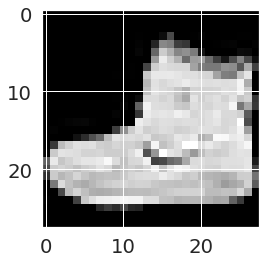

In [194]:
plt.imshow(X_train[0], cmap = 'gray')

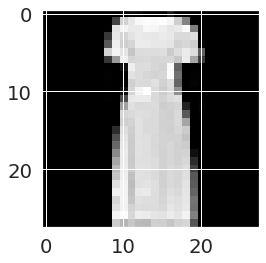

In [195]:
plt.imshow(X_train[50], cmap = 'gray')

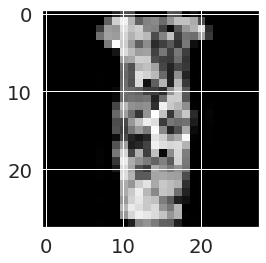

In [196]:
plt.imshow(X_test[100], cmap = 'gray')

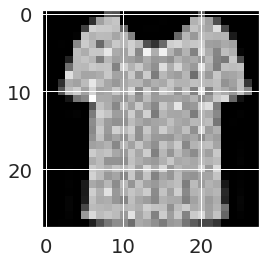

In [197]:
plt.imshow(X_test[1000], cmap = 'gray')

# 2. CHUẨN BỊ DỮ LIỆU


In [198]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train,test_size=0.1, random_state=42)


In [199]:
X_train_reshaped = X_train.reshape(-1, 784)
X_dev_reshaped = X_dev.reshape(-1, 784)
X_test_reshaped = X_test.reshape(-1, 784)


In [200]:
from tensorflow.keras.utils import to_categorical
y_train_new = to_categorical(y_train, num_classes=10)
y_dev_new = to_categorical(y_dev, num_classes=10)

# 3. XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH

In [201]:
y_train_new.shape

(54000, 10)

In [202]:
from keras.models import Sequential
from keras.layers import Dense  
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy

In [203]:
model = Sequential()
model.add(Dense(784, input_shape=(784, ),activation='relu'))
model.add(Dense(10, input_shape=(10, ), activation='sigmoid'))
optimizer = SGD(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])

In [204]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 784)               615440    
                                                                 
 dense_57 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [205]:
history = model.fit(X_train_reshaped, y_train_new,
validation_data=(X_dev_reshaped, y_dev_new),
batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 5.0985 - accuracy: 0.6847 - val_loss: 0.1378 - val_accuracy: 0.7437
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1229 - accuracy: 0.7602 - val_loss: 0.1171 - val_accuracy: 0.7717
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.7874 - val_loss: 0.1060 - val_accuracy: 0.7945
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0967 - accuracy: 0.8110 - val_loss: 0.0987 - val_accuracy: 0.8120
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.8273 - val_loss: 0.0981 - val_accuracy: 0.8115
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.8366 - val_loss: 0.0931 - val_accuracy: 0.8245
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.8431 - val_loss: 0.0955 - val_accuracy: 0.8230
Epoch 

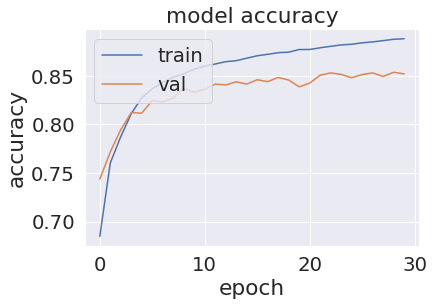

In [206]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

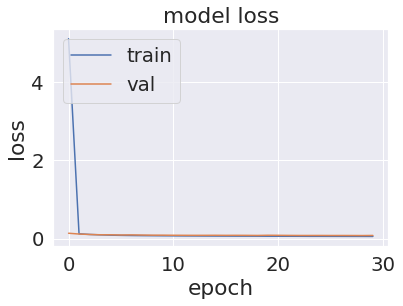

In [207]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 4. HÀM MẤT MÁT (LOSS)


In [208]:
from tensorflow.keras.losses import BinaryCrossentropy
loss = BinaryCrossentropy()

# 5. CHUẨN HÓA MÔ HÌNH (REGULARIZATION)



In [209]:
from tensorflow.python.keras import regularizers
kernal_regularizer=regularizers.l1_l2(l1=0, l2=0.01)

In [210]:
model2 = Sequential()
model2.add(Dense(784, input_shape=(784, ), kernel_regularizer=regularizers.l2(0.01),
                 bias_regularizer=regularizers.l2(0.01), activation='relu'))
model2.add(Dense(10, input_shape=(10, ), kernel_regularizer=regularizers.l2(0.01),
                 bias_regularizer=regularizers.l2(0.01), activation='sigmoid'))

In [211]:
optimizer = SGD(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model2.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])

In [212]:
history = model2.fit(X_train_reshaped, y_train_new,
validation_data=(X_dev_reshaped, y_dev_new),
batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 13.5530 - accuracy: 0.7104 - val_loss: 8.3189 - val_accuracy: 0.7725
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 7.6494 - accuracy: 0.7976 - val_loss: 7.0269 - val_accuracy: 0.7972
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 6.4616 - accuracy: 0.8228 - val_loss: 5.9420 - val_accuracy: 0.8115
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 5.4642 - accuracy: 0.8352 - val_loss: 5.0246 - val_accuracy: 0.8267
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 4.6237 - accuracy: 0.8443 - val_loss: 4.2600 - val_accuracy: 0.8217
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 3.9146 - accuracy: 0.8511 - val_loss: 3.6060 - val_accuracy: 0.8342
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 3.3164 - accuracy: 0.8564 - val_loss: 3.0543 - val_accuracy: 0.8488
Epoch

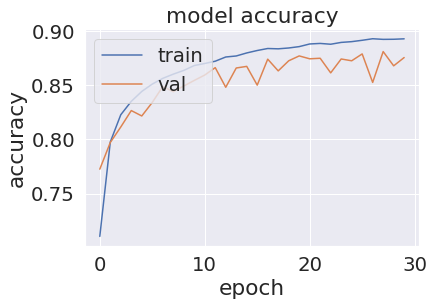

In [213]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

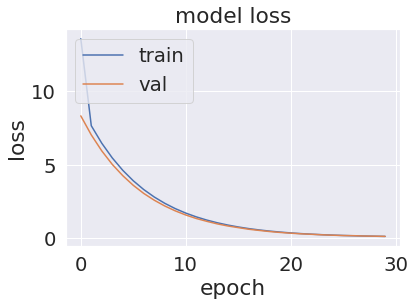

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [215]:
y_pred = model.predict(X_test_reshaped)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
y_pred = np.argmax(y_pred, axis=-1)
print('Accuracy is ', accuracy_score(y_test, y_pred)*100)


313/313 [==============================] - 0s 1ms/step
Accuracy is  84.83000000000001


# 6. KHỞI TẠO THAM SỐ (PARAMETER INITIALIZATION)

## Mô hình khởi tạo là zeros

In [216]:
from tensorflow.keras.initializers import GlorotUniform
from tensorflow import zeros, ones
model_6_0 = Sequential()
model_6_0.add(Dense(784, input_shape=(784, ), kernel_initializer=zeros, bias_initializer=zeros, activation='relu'))
model_6_0.add(Dense(10, activation='sigmoid'))
model_6_0.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_6_0.build((None, 784))
model_6_0.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 784)               615440    
                                                                 
 dense_61 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [217]:
history_6_0 = model_6_0.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 3ms/step - loss: 0.6617 - accuracy: 0.0994 - val_loss: 0.6323 - val_accuracy: 0.0917
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.6068 - accuracy: 0.0999 - val_loss: 0.5829 - val_accuracy: 0.0917
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5622 - accuracy: 0.1003 - val_loss: 0.5427 - val_accuracy: 0.0917
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5258 - accuracy: 0.1009 - val_loss: 0.5099 - val_accuracy: 0.0917
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4960 - accuracy: 0.1009 - val_loss: 0.4829 - val_accuracy: 0.0917
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.1009 - val_loss: 0.4605 - val_accuracy: 0.0917
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4510 - accuracy: 0.1009 - val_loss: 0.4419 - val_accuracy: 0.0917
Epoch 

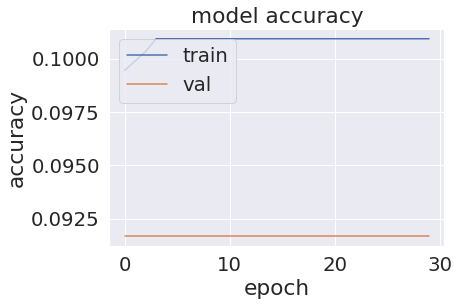

In [218]:
plt.plot(history_6_0.history['accuracy'])
plt.plot(history_6_0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

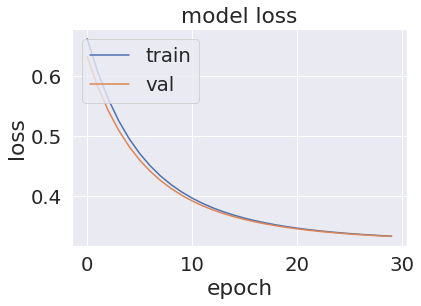

In [219]:
plt.plot(history_6_0.history['loss'])
plt.plot(history_6_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Mô hình khởi tạo là ones 

In [220]:
model_6_1 = Sequential()
model_6_1.add(Dense(784, input_shape=(784, ), kernel_initializer=ones, bias_initializer=ones, activation='relu'))
model_6_1.add(Dense(10, activation='sigmoid'))
model_6_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_6_1.build((None, 784))
model_6_1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 784)               615440    
                                                                 
 dense_63 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [221]:
history_6_1 = model_6_1.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 3ms/step - loss: 520386.3750 - accuracy: 0.0978 - val_loss: 0.6323 - val_accuracy: 0.0917
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.6068 - accuracy: 0.0989 - val_loss: 0.5829 - val_accuracy: 0.0917
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5622 - accuracy: 0.1008 - val_loss: 0.5427 - val_accuracy: 0.0917
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5258 - accuracy: 0.1004 - val_loss: 0.5099 - val_accuracy: 0.0917
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4960 - accuracy: 0.1009 - val_loss: 0.4829 - val_accuracy: 0.0917
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.1009 - val_loss: 0.4605 - val_accuracy: 0.0917
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4510 - accuracy: 0.1009 - val_loss: 0.4419 - val_accuracy: 0.0917
E

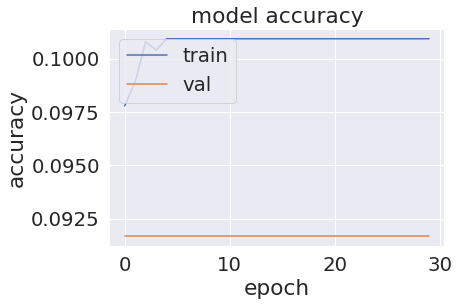

In [222]:
plt.plot(history_6_1.history['accuracy'])
plt.plot(history_6_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

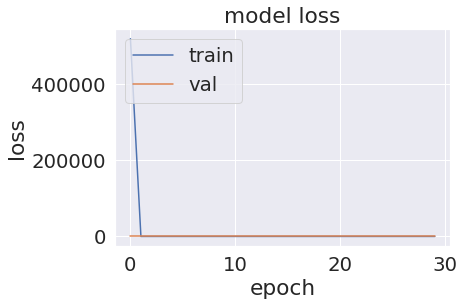

In [223]:
plt.plot(history_6_1.history['loss'])
plt.plot(history_6_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 7. CÁC THUẬT TOÁN TỐI ƯU (OPTIMIZATION)


## Model: SGD + learning_rate = 0.01

In [224]:
optimizer = SGD(learning_rate=0.01)
model_7_0 = Sequential()
model_7_0.add(Dense(784, input_shape=(784, ), kernel_initializer=GlorotUniform(), bias_initializer=ones, activation='relu'))
model_7_0.add(Dense(10, activation='sigmoid'))
model_7_0.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_7_0.build((None, 784))
model_7_0.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 784)               615440    
                                                                 
 dense_65 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [225]:
history_7_0 = model_7_0.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 3ms/step - loss: 4.0267 - accuracy: 0.6902 - val_loss: 0.1418 - val_accuracy: 0.7103
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.7696 - val_loss: 0.1167 - val_accuracy: 0.7697
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.8001 - val_loss: 0.1008 - val_accuracy: 0.8122
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0941 - accuracy: 0.8182 - val_loss: 0.0971 - val_accuracy: 0.8167
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0882 - accuracy: 0.8269 - val_loss: 0.0935 - val_accuracy: 0.8237
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0840 - accuracy: 0.8352 - val_loss: 0.0891 - val_accuracy: 0.8315
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0810 - accuracy: 0.8415 - val_loss: 0.0904 - val_accuracy: 0.8303
Epoch 

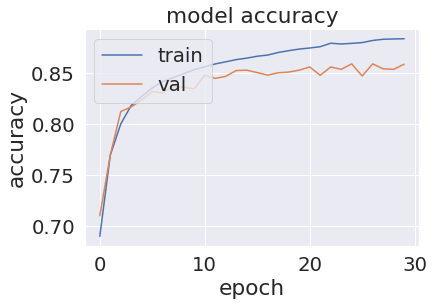

In [226]:
plt.plot(history_7_0.history['accuracy'])
plt.plot(history_7_0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

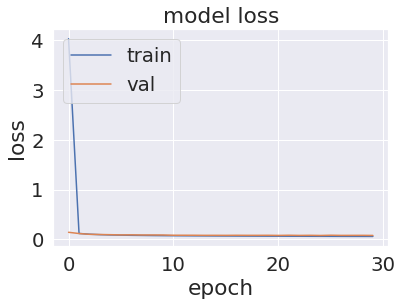

In [227]:
plt.plot(history_7_0.history['loss'])
plt.plot(history_7_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model: SGD + learning_rate=0.01 + momentum=0.9

In [228]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_7_1 = Sequential()
model_7_1.add(Dense(784, input_shape=(784, ), kernel_initializer=GlorotUniform(), bias_initializer=ones, activation='relu'))
model_7_1.add(Dense(10, activation='sigmoid'))
model_7_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_7_1.build((None, 784))
model_7_1.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 784)               615440    
                                                                 
 dense_67 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [229]:
history_7_1 = model_7_1.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 23.1663 - accuracy: 0.4346 - val_loss: 0.2461 - val_accuracy: 0.4667
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.2444 - accuracy: 0.5121 - val_loss: 0.1948 - val_accuracy: 0.5107
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1580 - accuracy: 0.6408 - val_loss: 0.1252 - val_accuracy: 0.7133
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1210 - accuracy: 0.7248 - val_loss: 0.1279 - val_accuracy: 0.7002
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1663 - accuracy: 0.6482 - val_loss: 0.2317 - val_accuracy: 0.5673
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1852 - accuracy: 0.6101 - val_loss: 0.1714 - val_accuracy: 0.5982
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1688 - accuracy: 0.6231 - val_loss: 0.1855 - val_accuracy: 0.6138
Epoch

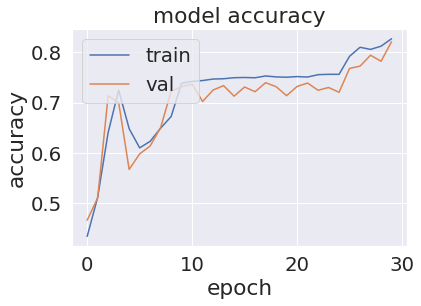

In [230]:
plt.plot(history_7_1.history['accuracy'])
plt.plot(history_7_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

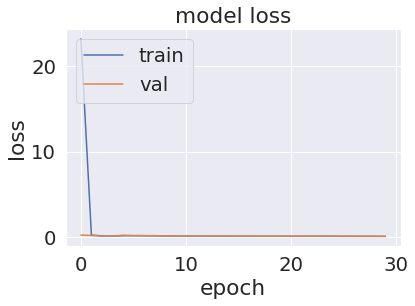

In [231]:
plt.plot(history_7_1.history['loss'])
plt.plot(history_7_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model: RMSProp + learning_rate=0.01 + momentum=0.9 

In [232]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_7_2 = Sequential()
model_7_2.add(Dense(784, input_shape=(784, ), kernel_initializer=GlorotUniform(), bias_initializer=ones, activation='relu'))
model_7_2.add(Dense(10, activation='sigmoid'))
model_7_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_7_2.build((None, 784))
model_7_2.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 784)               615440    
                                                                 
 dense_69 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [233]:
history_7_2 = model_7_2.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 14.7481 - accuracy: 0.5461 - val_loss: 0.2558 - val_accuracy: 0.6062
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1938 - accuracy: 0.6930 - val_loss: 0.2159 - val_accuracy: 0.6553
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.2092 - accuracy: 0.6519 - val_loss: 0.1861 - val_accuracy: 0.7190
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1644 - accuracy: 0.6847 - val_loss: 0.1675 - val_accuracy: 0.6432
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1471 - accuracy: 0.6514 - val_loss: 0.1490 - val_accuracy: 0.6090
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.6573 - val_loss: 0.1813 - val_accuracy: 0.6500
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.6548 - val_loss: 0.1717 - val_accuracy: 0.6400
Epoch

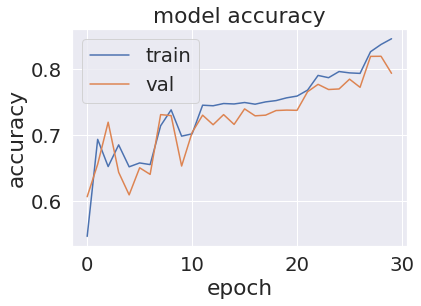

In [234]:
plt.plot(history_7_2.history['accuracy'])
plt.plot(history_7_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

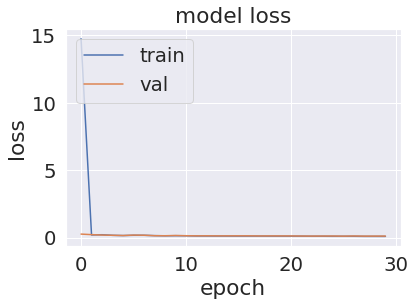

In [235]:
plt.plot(history_7_2.history['loss'])
plt.plot(history_7_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model: Adam + learning_rate=1e-5

In [236]:
model_7_3 = Sequential()
optimizer = Adam(learning_rate=1e-5)
model_7_3.add(Dense(784, input_shape=(784, ), kernel_initializer=GlorotUniform(), bias_initializer=zeros, activation='relu'))
model_7_3.add(Dense(10, activation='sigmoid'))
model_7_3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_7_3.build((None, 784))
model_7_3.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 784)               615440    
                                                                 
 dense_71 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [237]:
history_7_3 = model_7_3.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 5.7535 - accuracy: 0.4425 - val_loss: 2.1122 - val_accuracy: 0.6320
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 1.6725 - accuracy: 0.6902 - val_loss: 1.4472 - val_accuracy: 0.7153
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 1.2526 - accuracy: 0.7445 - val_loss: 1.1891 - val_accuracy: 0.7443
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 1.0391 - accuracy: 0.7716 - val_loss: 1.0214 - val_accuracy: 0.7672
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.9039 - accuracy: 0.7888 - val_loss: 0.9146 - val_accuracy: 0.7823
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.8090 - accuracy: 0.7983 - val_loss: 0.8654 - val_accuracy: 0.7870
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.7312 - accuracy: 0.8089 - val_loss: 0.7962 - val_accuracy: 0.7977
Epoch 

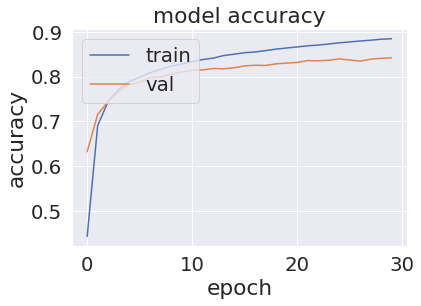

In [238]:
plt.plot(history_7_3.history['accuracy'])
plt.plot(history_7_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

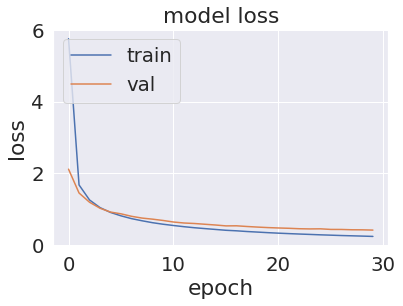

In [239]:
plt.plot(history_7_3.history['loss'])
plt.plot(history_7_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 8. DỪNG SỚM (EARLY STOPPING)

In [240]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_loss", patience=3)
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_8_0 = Sequential()
model_8_0.add(Dense(784, input_shape=(784, ), kernel_initializer=GlorotUniform(), bias_initializer=ones, activation='relu'))
model_8_0.add(Dense(10, activation='sigmoid'))
model_8_0.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_8_0.build((None, 784))
model_8_0.summary()
history_8_0 = model_8_0.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30, callbacks=callback)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 784)               615440    
                                                                 
 dense_73 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 30.3406 - accuracy: 0.4945 - val_loss: 0.3251 - val_accuracy: 0.5118
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.2622 - accuracy: 0.5110 - val_loss: 0.2484 - val_accuracy: 0.5075
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1957 - accuracy: 0.6227 - val_loss: 0.1758 - val_accuracy: 0.6452
Epoch 4/30
422/4

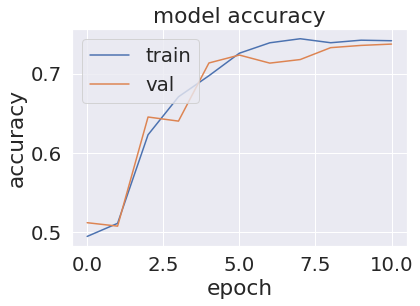

In [241]:
import matplotlib.pyplot as plt
plt.plot(history_8_0.history['accuracy'])
plt.plot(history_8_0.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

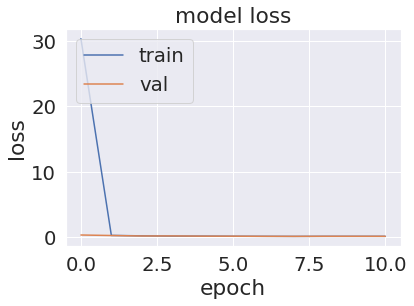

In [242]:
import matplotlib.pyplot as plt
plt.plot(history_8_0.history['loss'])
plt.plot(history_8_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [243]:
y_pred = model_8_0.predict(X_test_reshaped)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
y_pred = np.argmax(y_pred, axis=-1)
print('Accuracy is ', accuracy_score(y_test, y_pred)*100)


313/313 [==============================] - 0s 1ms/step
Accuracy is  74.13


     0    1  2    3    4    5   6    7    8    9
0  876    2  3   40   53    1  16    0    9    0
1    9  940  0   29   20    0   1    0    1    0
2   23    3  3    9  938    0  18    1    5    0
3   34    4  0  869   76    0  13    0    4    0
4    1    1  1   44  941    3   5    0    4    0
5    3    0  1    0    4  922   1   37    4   28
6  247    3  2   28  671    1  35    0   13    0
7    0    0  0    0    1   15   0  948    3   33
8    3    1  0   10   51    2   4    5  924    0
9    0    0  0    0    1    5   0   38    1  955


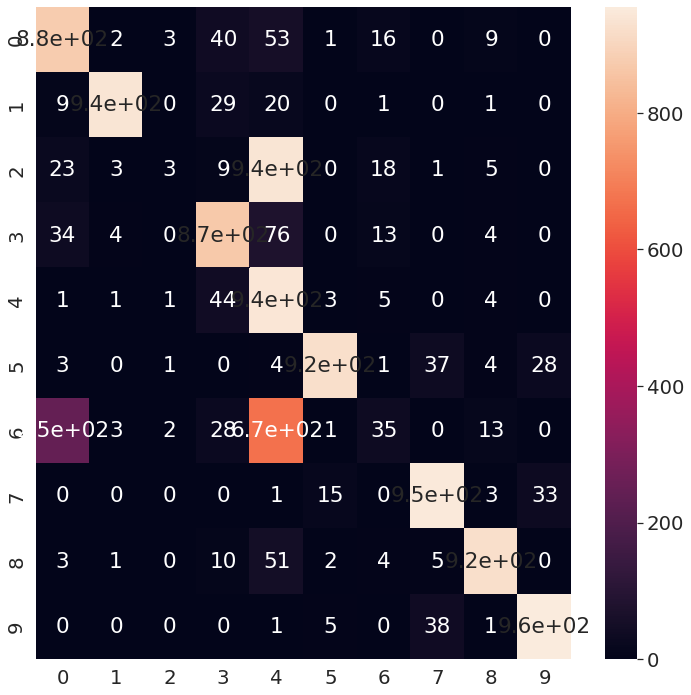

In [244]:
import seaborn as sn
import pandas as pd 
import matplotlib.pyplot as plt
cf = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])

print(df_cm)
plt.figure(figsize = (12,12))
sn.set(font_scale=1.8)
sn.heatmap(df_cm, annot=True)
plt.show()

# BÀI TẬP 

## Bài tập 1 

In [245]:
model_bt1 = Sequential()
model_bt1.add(Dense(784, input_shape=(784, ),activation='relu'))
model_bt1.add(Dense(10, input_shape=(10, ), activation='sigmoid'))
optimizer = SGD(learning_rate=0.01)
loss1 = BinaryCrossentropy()
model_bt1.compile(optimizer=optimizer, loss=loss1, metrics=['accuracy'])

In [246]:
history_bt1 = model_bt1.fit(X_train_reshaped, y_train_new,
validation_data=(X_dev_reshaped, y_dev_new),
batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 3.4091 - accuracy: 0.7292 - val_loss: 0.1274 - val_accuracy: 0.7618
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1136 - accuracy: 0.7975 - val_loss: 0.1080 - val_accuracy: 0.7982
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.8192 - val_loss: 0.1005 - val_accuracy: 0.8178
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.8348 - val_loss: 0.0947 - val_accuracy: 0.8295
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.8417 - val_loss: 0.0910 - val_accuracy: 0.8357
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0789 - accuracy: 0.8504 - val_loss: 0.0902 - val_accuracy: 0.8347
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.8543 - val_loss: 0.0877 - val_accuracy: 0.8413
Epoch 

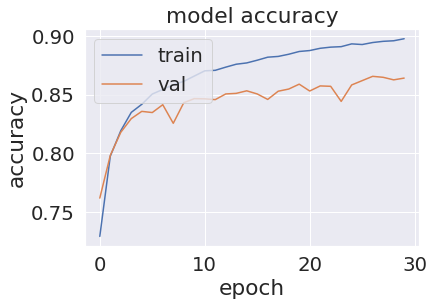

In [247]:
import matplotlib.pyplot as plt
plt.plot(history_bt1.history['accuracy'])
plt.plot(history_bt1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

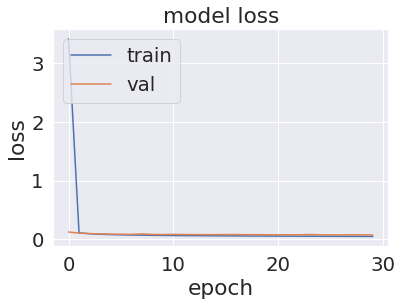

In [248]:
import matplotlib.pyplot as plt
plt.plot(history_bt1.history['loss'])
plt.plot(history_bt1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [249]:
y_pred = model_bt1.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy_score', accuracy_score(y_test, y_pred)*100)

313/313 [==============================] - 0s 1ms/step
accuracy_score 85.83


## Bài tập 2 

In [250]:
model_bt2 = Sequential()
model_bt2.add(Dense(784, activation='relu', kernel_regularizer = regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_bt2.add(Dense(10, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_bt2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt2.build((None, 784))
model_bt2.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 784)               615440    
                                                                 
 dense_77 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [251]:
history_bt2 = model_bt2.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 102.2304 - accuracy: 0.7155 - val_loss: 25.5152 - val_accuracy: 0.7693
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 35.5571 - accuracy: 0.4874 - val_loss: 194.6535 - val_accuracy: 0.3237
Epoch 3/30
422/422 [==============================] - 1s 4ms/step - loss: 67.4121 - accuracy: 0.4033 - val_loss: 71.3561 - val_accuracy: 0.3708
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 62.2341 - accuracy: 0.4391 - val_loss: 43.3948 - val_accuracy: 0.5595
Epoch 5/30
422/422 [==============================] - 2s 4ms/step - loss: 49.4257 - accuracy: 0.5360 - val_loss: 31.3611 - val_accuracy: 0.5262
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 35.3438 - accuracy: 0.5595 - val_loss: 24.8630 - val_accuracy: 0.5507
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 54.2038 - accuracy: 0.5069 - val_loss: 30.7217 - val_accurac

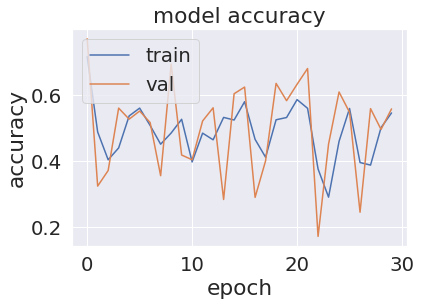

In [252]:
import matplotlib.pyplot as plt
plt.plot(history_bt2.history['accuracy'])
plt.plot(history_bt2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

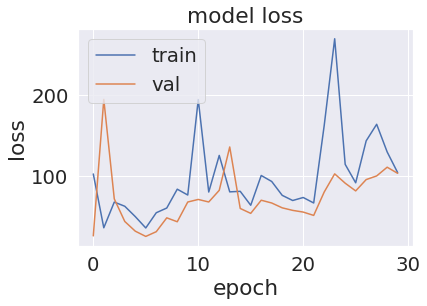

In [253]:
import matplotlib.pyplot as plt
plt.plot(history_bt2.history['loss'])
plt.plot(history_bt2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [254]:
y_pred = model_bt2.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy_score', accuracy_score(y_test, y_pred)*100)

313/313 [==============================] - 0s 1ms/step
accuracy_score 55.46


## Bài tập 3

In [255]:
model_bt3 = Sequential()
model_bt3.add(Dense(784, input_shape=(784, ), kernel_initializer=ones, bias_initializer=zeros, activation='relu'))
model_bt3.add(Dense(10, activation='sigmoid'))
model_bt3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt3.build((None, 784))
model_bt3.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 784)               615440    
                                                                 
 dense_79 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [256]:
history_bt3 = model_bt3.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 3ms/step - loss: 530881.1250 - accuracy: 0.0991 - val_loss: 0.6323 - val_accuracy: 0.0917
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.6068 - accuracy: 0.0994 - val_loss: 0.5829 - val_accuracy: 0.0917
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5622 - accuracy: 0.1009 - val_loss: 0.5427 - val_accuracy: 0.0917
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.5258 - accuracy: 0.1009 - val_loss: 0.5099 - val_accuracy: 0.0917
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4960 - accuracy: 0.1009 - val_loss: 0.4829 - val_accuracy: 0.0917
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.1009 - val_loss: 0.4605 - val_accuracy: 0.0917
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.4510 - accuracy: 0.1009 - val_loss: 0.4419 - val_accuracy: 0.0917
E

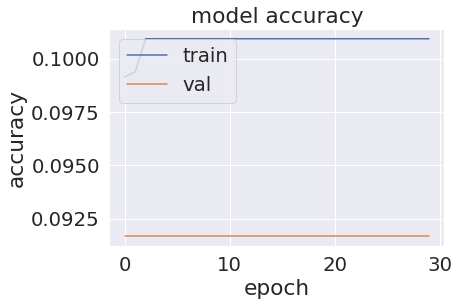

In [257]:
import matplotlib.pyplot as plt
plt.plot(history_bt3.history['accuracy'])
plt.plot(history_bt3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

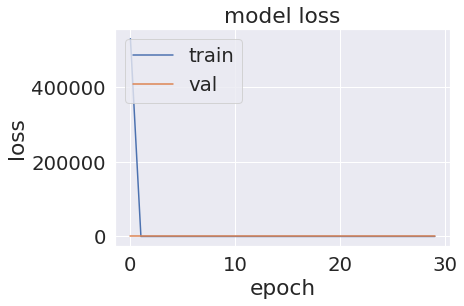

In [258]:
import matplotlib.pyplot as plt
plt.plot(history_bt3.history['loss'])
plt.plot(history_bt3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [259]:
y_pred = model_bt3.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy_score', accuracy_score(y_test, y_pred)*100)

313/313 [==============================] - 0s 1ms/step
accuracy_score 10.0


## Bài tập 4

In [260]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_bt4_1 = Sequential()
model_bt4_1.add(Dense(784, input_shape=(784, ), kernel_initializer=GlorotUniform(), bias_initializer=ones, activation='relu'))
model_bt4_1.add(Dense(10, activation='sigmoid'))
model_bt4_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt4_1.build((None, 784))
model_bt4_1.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 784)               615440    
                                                                 
 dense_81 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [261]:
history_bt4_1 = model_bt4_1.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 11.0728 - accuracy: 0.6425 - val_loss: 0.1653 - val_accuracy: 0.7080
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1659 - accuracy: 0.7082 - val_loss: 0.2029 - val_accuracy: 0.7005
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1682 - accuracy: 0.7044 - val_loss: 0.2011 - val_accuracy: 0.6882
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1645 - accuracy: 0.7091 - val_loss: 0.1793 - val_accuracy: 0.6615
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1653 - accuracy: 0.6755 - val_loss: 0.1990 - val_accuracy: 0.6787
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1805 - accuracy: 0.6476 - val_loss: 0.1951 - val_accuracy: 0.6527
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.1852 - accuracy: 0.6504 - val_loss: 0.1862 - val_accuracy: 0.6510
Epoch

In [262]:
y_pred = model_bt4_1.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy_score', accuracy_score(y_test, y_pred)*100)

313/313 [==============================] - 0s 1ms/step
accuracy_score 74.27


In [263]:
model_bt4_2 = Sequential()
optimizer = Adam(learning_rate=1e-5)
model_bt4_2.add(Dense(784, input_shape=(784, ), kernel_initializer=GlorotUniform(), bias_initializer=zeros, activation='relu'))
model_bt4_2.add(Dense(10, activation='sigmoid'))
model_bt4_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt4_2.build((None, 784))
model_bt4_2.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 784)               615440    
                                                                 
 dense_83 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [264]:
history_bt4_2 = model_bt4_2.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
422/422 [==============================] - 2s 4ms/step - loss: 5.6297 - accuracy: 0.4605 - val_loss: 2.0663 - val_accuracy: 0.6327
Epoch 2/30
422/422 [==============================] - 1s 3ms/step - loss: 1.6884 - accuracy: 0.6923 - val_loss: 1.4182 - val_accuracy: 0.7230
Epoch 3/30
422/422 [==============================] - 1s 3ms/step - loss: 1.2729 - accuracy: 0.7476 - val_loss: 1.1634 - val_accuracy: 0.7568
Epoch 4/30
422/422 [==============================] - 1s 3ms/step - loss: 1.0618 - accuracy: 0.7739 - val_loss: 1.0054 - val_accuracy: 0.7843
Epoch 5/30
422/422 [==============================] - 1s 3ms/step - loss: 0.9256 - accuracy: 0.7910 - val_loss: 0.9079 - val_accuracy: 0.7922
Epoch 6/30
422/422 [==============================] - 1s 3ms/step - loss: 0.8259 - accuracy: 0.8027 - val_loss: 0.8315 - val_accuracy: 0.7992
Epoch 7/30
422/422 [==============================] - 1s 3ms/step - loss: 0.7497 - accuracy: 0.8103 - val_loss: 0.7776 - val_accuracy: 0.8068
Epoch 

In [265]:
y_pred = model_bt4_2.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy_score', accuracy_score(y_test, y_pred)*100)

313/313 [==============================] - 0s 1ms/step
accuracy_score 84.11999999999999


## Bài tập 5

In [266]:
model_bt5 = Sequential()
model_bt5.add(Dense(784, activation='relu', kernel_regularizer = regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_bt5.add(Dense(10, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
optimizer = SGD(learning_rate=0.01)
model_bt5.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt5.build((None, 784))
model_bt5.summary()

history_bt5 = model_bt5.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=8, epochs=10)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 784)               615440    
                                                                 
 dense_85 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6750/6750 [==============================] - 18s 3ms/step - loss: 156.9412 - accuracy: 0.2750 - val_loss: 168.7958 - val_accuracy: 0.2468
Epoch 2/10
6750/6750 [==============================] - 17s 3ms/step - loss: 312.4807 - accuracy: 0.2939 - val_loss: 295.3511 - val_accuracy: 0.3432
Epoch 3/10
6750/6750 [==============================] - 17s 3ms/step - loss: 242.4816 - accuracy: 0.3848 - val_loss: 189.0079 - val_accuracy: 0.3

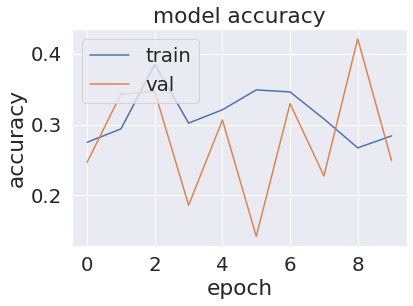

In [267]:
plt.plot(history_bt5.history['accuracy'])
plt.plot(history_bt5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

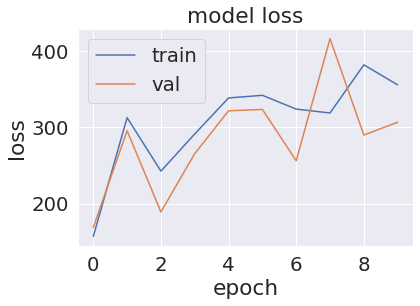

In [268]:
plt.plot(history_bt5.history['loss'])
plt.plot(history_bt5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Bài tập 6

In [269]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_loss", patience=2)
model_bt6 = Sequential()
model_bt6.add(Dense(784, activation='relu', kernel_regularizer = regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_bt6.add(Dense(10, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
optimizer = SGD(learning_rate=0.01)
model_bt6.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt6.build((None, 784))
model_bt6.summary()

history_bt6 = model_bt6.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=100, callbacks=callback)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 784)               615440    
                                                                 
 dense_87 (Dense)            (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
422/422 [==============================] - 2s 4ms/step - loss: 102.4941 - accuracy: 0.7118 - val_loss: 26.0050 - val_accuracy: 0.7585
Epoch 2/100
422/422 [==============================] - 2s 4ms/step - loss: 19.5121 - accuracy: 0.4956 - val_loss: 20.7327 - val_accuracy: 0.4810
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 31.4582 - accuracy: 0.4745 - val_loss: 30.4558 - val_accuracy: 0.4705
Epoch 4

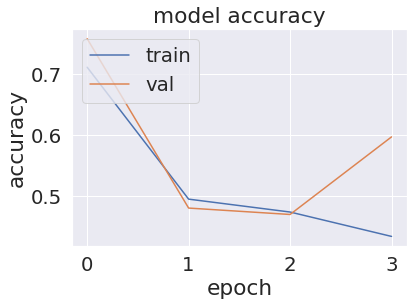

In [285]:
plt.plot(history_bt6.history['accuracy'])
plt.plot(history_bt6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

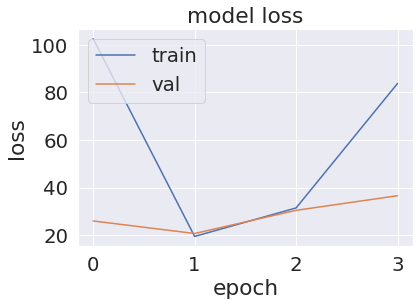

In [286]:
plt.plot(history_bt6.history['loss'])
plt.plot(history_bt6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Bài tập 7* 

### Bài tập 1*

In [270]:
from tensorflow.keras.datasets.cifar10 import load_data 
(X_train, y_train), (X_test, y_test) = load_data()

In [271]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_reshaped = X_train.reshape(-1, 3072)
X_dev_reshaped = X_dev.reshape(-1, 3072)
X_test_reshaped = X_test.reshape(-1, 3072)
y_train_new = to_categorical(y_train, num_classes=10)
y_dev_new = to_categorical(y_dev, num_classes=10)
y_test_new = to_categorical(y_test, num_classes=10)

In [272]:
model_bt7_1 = Sequential()
model_bt7_1.add(Dense(3072, activation='relu'))
model_bt7_1.add(Dense(10, activation='sigmoid'))
model_bt7_1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt7_1.build((None, 3072))
model_bt7_1.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_89 (Dense)            (None, 10)                30730     
                                                                 
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


In [273]:
history_bt7_1 = model_bt7_1.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=30)

Epoch 1/30
352/352 [==============================] - 2s 5ms/step - loss: 344.6060 - accuracy: 0.1099 - val_loss: 0.6580 - val_accuracy: 0.1026
Epoch 2/30
352/352 [==============================] - 1s 4ms/step - loss: 0.6494 - accuracy: 0.1064 - val_loss: 0.6174 - val_accuracy: 0.1010
Epoch 3/30
352/352 [==============================] - 1s 4ms/step - loss: 0.6051 - accuracy: 0.1077 - val_loss: 0.5439 - val_accuracy: 0.0922
Epoch 4/30
352/352 [==============================] - 1s 4ms/step - loss: 0.5724 - accuracy: 0.1077 - val_loss: 0.5551 - val_accuracy: 0.0998
Epoch 5/30
352/352 [==============================] - 1s 4ms/step - loss: 0.5385 - accuracy: 0.1058 - val_loss: 0.5265 - val_accuracy: 0.0992
Epoch 6/30
352/352 [==============================] - 1s 4ms/step - loss: 0.5124 - accuracy: 0.1074 - val_loss: 0.5023 - val_accuracy: 0.1036
Epoch 7/30
352/352 [==============================] - 1s 4ms/step - loss: 0.4871 - accuracy: 0.1075 - val_loss: 0.4838 - val_accuracy: 0.1000
Epoc

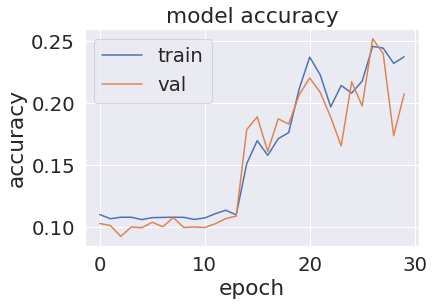

In [274]:
plt.plot(history_bt7_1.history['accuracy'])
plt.plot(history_bt7_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

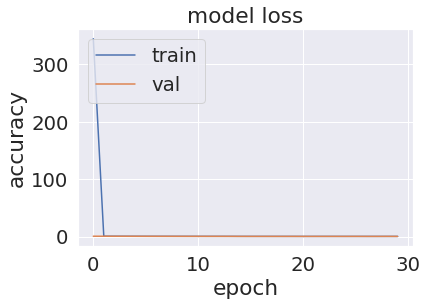

In [275]:
plt.plot(history_bt7_1.history['loss'])
plt.plot(history_bt7_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [276]:
y_pred = model_bt7_1.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy_score', accuracy_score(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
accuracy_score 0.2073


### Bài tập 2*

In [277]:
model_bt7_2 = Sequential()
model_bt7_2.add(Dense(3072, activation='relu', kernel_regularizer = regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_bt7_2.add(Dense(10, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_bt7_2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt7_2.build((None, 3072))
model_bt7_2.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_91 (Dense)            (None, 10)                30730     
                                                                 
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


In [278]:
history_bt7_2 = model_bt7_2.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=128, epochs=10)

Epoch 1/10
352/352 [==============================] - 3s 6ms/step - loss: 458542.5000 - accuracy: 0.1043 - val_loss: 192875.8281 - val_accuracy: 0.1046
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 8741865.0000 - accuracy: 0.1014 - val_loss: 213222.4844 - val_accuracy: 0.1242
Epoch 3/10
352/352 [==============================] - 2s 6ms/step - loss: 1271768.1250 - accuracy: 0.1020 - val_loss: 270596.9062 - val_accuracy: 0.1008
Epoch 4/10
352/352 [==============================] - 2s 6ms/step - loss: 1302991.8750 - accuracy: 0.1004 - val_loss: 299431.0625 - val_accuracy: 0.1000
Epoch 5/10
352/352 [==============================] - 2s 6ms/step - loss: 495491.4375 - accuracy: 0.1008 - val_loss: 310568.9375 - val_accuracy: 0.1000
Epoch 6/10
352/352 [==============================] - 2s 6ms/step - loss: 944545.0000 - accuracy: 0.0985 - val_loss: 334723.2812 - val_accuracy: 0.1000
Epoch 7/10
352/352 [==============================] - 2s 6ms/step - loss: 520086.5000

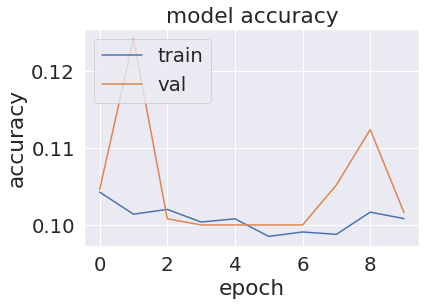

In [279]:
plt.plot(history_bt7_2.history['accuracy'])
plt.plot(history_bt7_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

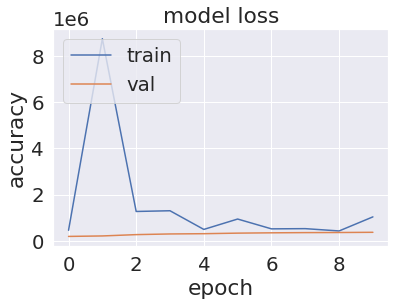

In [280]:
plt.plot(history_bt7_2.history['loss'])
plt.plot(history_bt7_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [281]:
y_pred = model_bt7_2.predict(X_test_reshaped)
y_pred = np.argmax(y_pred, axis=-1)
print('accuracy_score', accuracy_score(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
accuracy_score 0.1


### Bài tập 6* 

In [282]:
model_bt7_6 = Sequential()
model_bt7_6.add(Dense(3072, activation='relu', kernel_regularizer = regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_bt7_6.add(Dense(10, activation='sigmoid', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
optimizer = SGD(learning_rate=0.01)
model_bt7_6.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model_bt7_6.build((None, 3072))
model_bt7_6.summary()
history_bt7_6 = model_bt7_6.fit(X_train_reshaped, y_train_new, validation_data=(X_dev_reshaped, y_dev_new), batch_size=8, epochs=100, callbacks=callback)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_93 (Dense)            (None, 10)                30730     
                                                                 
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5625/5625 [==============================] - 27s 5ms/step - loss: 256765.8438 - accuracy: 0.0985 - val_loss: 161633.9688 - val_accuracy: 0.1046
Epoch 2/100
5625/5625 [==============================] - 27s 5ms/step - loss: 348474.9688 - accuracy: 0.1002 - val_loss: 237649.2344 - val_accuracy: 0.0962
Epoch 3/100
5625/5625 [==============================] - 27s 5ms/step - loss: 442575.7500 - accuracy: 0.1004 - val_loss: 304527

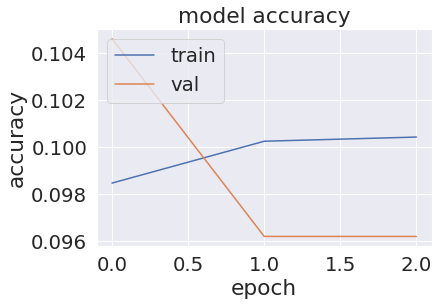

In [283]:
plt.plot(history_bt7_6.history['accuracy'])
plt.plot(history_bt7_6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

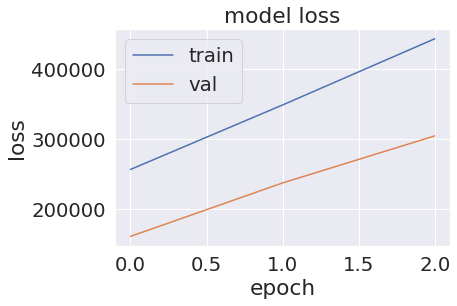

In [284]:
plt.plot(history_bt7_6.history['loss'])
plt.plot(history_bt7_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()